In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [46]:
housevalue = fch() #会需要下载，大家可以提前运行试试看
X = pd.DataFrame(housevalue.data) #放入DataFrame中便于查看
y = housevalue.target
X.shape
y.shape
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [47]:
housevalue.feature_names
X.columns = housevalue.feature_names

In [48]:
"""
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
"""
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [49]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [50]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3)

In [51]:
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [52]:
Xtrain

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.4732,14.0,4.445402,1.074713,4731.0,13.594828,37.00,-122.06
1,4.9375,19.0,4.617647,1.056985,1275.0,2.343750,33.87,-118.36
2,2.4890,51.0,4.165394,1.178117,1543.0,3.926209,37.78,-122.22
3,2.4398,52.0,4.794337,1.105812,1670.0,2.488823,38.29,-122.29
4,7.6420,23.0,7.232982,0.988495,3221.0,3.088207,34.19,-118.66
...,...,...,...,...,...,...,...,...
14443,4.0507,34.0,4.984127,1.059524,638.0,2.531746,37.98,-122.01
14444,1.4702,41.0,4.564286,1.100000,839.0,2.996429,38.54,-121.45
14445,3.8103,5.0,5.594216,1.056968,2965.0,2.598598,40.60,-122.33
14446,0.9336,10.0,3.662745,1.019608,401.0,1.572549,37.66,-120.98


In [75]:
model = LinearRegression()
model.fit(Xtrain,Ytrain)

LinearRegression()

In [76]:
ypre = model.predict(Xtest)

In [77]:
model.score(Xtest,Ytest)

0.6137858684386115

In [78]:
"""
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
"""
# 线性回归方程中估计出的系数
model.coef_
[*zip(Xtrain.columns,model.coef_)]

[('MedInc', 0.4342366185432525),
 ('HouseAge', 0.009738192092723572),
 ('AveRooms', -0.09889209396587358),
 ('AveBedrms', 0.5921061037734862),
 ('Population', -6.564336171608866e-07),
 ('AveOccup', -0.007397013350278438),
 ('Latitude', -0.4212896329837793),
 ('Longitude', -0.42922537810853584)]

In [79]:
# 截距
model.intercept_

-36.28906009088886

### 回归指标

In [98]:
# mse 均方误差 mae 绝对误差
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [99]:
MSE(Ytest,ypre)
MAE(Ytest,ypre)

0.521261021877794

In [100]:
score = cross_val_score(model,X,y,cv=10,scoring='neg_mean_squared_error').mean()
score

-0.5509524296956602

In [93]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [102]:
# R2
from sklearn.metrics import r2_score
r2_score(Ytest,ypre)

0.6137858684386115

In [103]:
cross_val_score(model,X,y,cv=10,scoring="r2").mean()

0.511006861052455

Missing colon in file WindowsPath('d:/ProgramData/Anaconda3/envs/learn-ml/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 256 ('<!-- #font.family:  sans-serif -->')
Missing colon in file 'd:\\ProgramData\\Anaconda3\\envs\\learn-ml\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc', line 256 ('<!-- #font.family:  sans-serif -->')


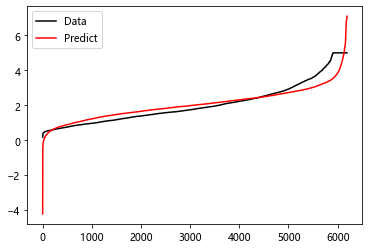

In [104]:
import matplotlib.pyplot as plt
sorted(Ytest)
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(ypre)),sorted(ypre),c="red",label = "Predict")
plt.legend()
plt.show()

In [106]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')

array([-179.12952605,   -5.692624  ,  -15.61747513,  -78.68042858,
        -59.5311006 ])